In [155]:
library(ggplot2)
library(gplots)
library("viridis")   
library('rjson')
library(reshape2)
library(broom)
library('heatmap.plus')
library(viridis)
library(gridExtra)

library(reticulate)
glypy <- import('glypy')

In [82]:
glycan_abd = data.matrix(read.csv('data-in/Sibille_2016_abundance_table.csv',row.names = 1))
rownames(glycan_abd) = gsub('/| ','.',rownames(glycan_abd))
motif_abd = t(read.csv('data-in/Sibille_2016_motif_abd_table.csv',row.names=1))

all(rownames(glycan_abd)==rownames(motif_abd))

samp_annot = merge(
    data.frame(panel=LETTERS[1:7],
        ceramide=c('36:1+38:1','34:1','40:1+42:2',rep(NA,4)),
        unsaturated=c(rep(NA,3),1,2,NA,NA),
        carbons=c(rep(NA,5),'lt34','gt42')),
    cbind(panel=substr(rownames(glycan_abd),1,1),rnam=rownames(glycan_abd)))
tmp = substr(samp_annot$rnam,3,nchar(as.character(samp_annot$rnam)))
samp_annot$tissue = factor(tmp,levels = c('Ciliary.Body','Retina','RPE.Choroid','Optic.Nerve','Brain','Plasma'))
samp_annot$rostral_caudal = ifelse(samp_annot$tissue=='Plasma',NA,as.numeric(samp_annot$tissue))
samp_annot$structure = factor(ifelse(samp_annot$tissue=='Plasma','body',ifelse(samp_annot$tissue %in% c('Ciliary.Body','Retina','RPE.Choroid'),'eye','CNS')))

samp_annot_col = data.frame(ceramide = c('lightblue','blue','darkblue')[samp_annot$ceramide],
                                unsaturated = c('black','grey')[samp_annot$unsaturated],
                                carbons = c('green','blue')[samp_annot$carbons],
                                tissue = inferno(6)[samp_annot$tissue],
                                rostral_caudal = inferno(6)[samp_annot$rostral_caudal],
                                structure = viridis(3)[samp_annot$structure])


head(samp_annot,n=10)

all(rownames(glycan_abd)==samp_annot$rname)
all(rownames(motif_abd)==samp_annot$rname)

glycan_abd = cbind(samp_annot,glycan_abd)
motif_abd = cbind(samp_annot,motif_abd)

var_annot = read.csv('data-in/Sibille_2016_variable_annotation.csv')

head(glycan_abd)
head(motif_abd)
#head(var_annot)

#motif_vect = fromJSON(file='../unicarb_substructures.linkSpecific.merged_reference_dict_28779_2020-09-10_00_53_50.json')
motif_vect = fromJSON(file='../unicarb_substructures.linkSpecific.merged_reference_dict_28815_2020-09-13_16_39_25.json')
motif_vect=melt(motif_vect)
head(motif_vect)

[1] TRUE

,panel,ceramide,unsaturated,carbons,rnam,tissue,rostral_caudal,structure
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,A,36:1+38:1,NA,NA,A.Retina,Retina,2,eye
2,A,36:1+38:1,NA,NA,A.Brain,Brain,5,CNS
3,A,36:1+38:1,NA,NA,A.RPE.Choroid,RPE.Choroid,3,eye
4,A,36:1+38:1,NA,NA,A.Ciliary.Body,Ciliary.Body,1,eye
5,A,36:1+38:1,NA,NA,A.Optic.Nerve,Optic.Nerve,4,CNS
6,A,36:1+38:1,NA,NA,A.Plasma,Plasma,NA,body
7,B,34:1,NA,NA,B.Retina,Retina,2,eye
8,B,34:1,NA,NA,B.Brain,Brain,5,CNS
9,B,34:1,NA,NA,B.RPE.Choroid,RPE.Choroid,3,eye


[1] TRUE

[1] TRUE

,panel,ceramide,unsaturated,carbons,rnam,tissue,rostral_caudal,structure,GM3,GM2,GD3,GD2,GD1a,GD1b,GT3,GT1b,GQ1b
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.Retina,A,36:1+38:1,NA,NA,A.Retina,Retina,2,eye,0.05,0.03,0.06,0.01,0.03,0.01,0.04,0.02,0.0
A.Brain,A,36:1+38:1,NA,NA,A.Brain,Brain,5,CNS,0.04,0.03,0.02,0.01,0.01,0.01,0.00,0.01,0.0
A.RPE.Choroid,A,36:1+38:1,NA,NA,A.RPE.Choroid,RPE.Choroid,3,eye,0.19,0.00,0.20,0.00,0.04,0.01,0.00,0.01,0.0
A.Ciliary.Body,A,36:1+38:1,NA,NA,A.Ciliary.Body,Ciliary.Body,1,eye,0.17,0.26,0.23,0.28,0.17,0.20,0.00,0.16,0.2
A.Optic.Nerve,A,36:1+38:1,NA,NA,A.Optic.Nerve,Optic.Nerve,4,CNS,0.08,0.01,0.05,0.00,0.00,0.00,0.00,0.00,0.0
A.Plasma,A,36:1+38:1,NA,NA,A.Plasma,Plasma,NA,body,0.37,0.25,0.39,0.00,0.39,0.04,0.00,0.11,0.0


,panel,ceramide,unsaturated,carbons,rnam,tissue,rostral_caudal,structure,L28785,L28795,L28799,L28808,L28810,L28813,L28803,L28804,L28791,L28807
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.Retina,A,36:1+38:1,NA,NA,A.Retina,Retina,2,eye,1,0.5600000,0.40000000,0.16,0.16000000,0.2400000,0.12000000,0.2000000,0.08000000,0.0000000
A.Brain,A,36:1+38:1,NA,NA,A.Brain,Brain,5,CNS,1,0.3846154,0.53846154,0.00,0.23076923,0.2307692,0.15384615,0.1538462,0.07692308,0.0000000
A.RPE.Choroid,A,36:1+38:1,NA,NA,A.RPE.Choroid,RPE.Choroid,3,eye,1,0.4888889,0.13333333,0.00,0.04444444,0.1333333,0.04444444,0.1111111,0.02222222,0.0000000
A.Ciliary.Body,A,36:1+38:1,NA,NA,A.Ciliary.Body,Ciliary.Body,1,eye,1,0.6407186,0.76047904,0.00,0.50299401,0.4371257,0.33532934,0.3173653,0.21556886,0.1197605
A.Optic.Nerve,A,36:1+38:1,NA,NA,A.Optic.Nerve,Optic.Nerve,4,CNS,1,0.3571429,0.07142857,0.00,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
A.Plasma,A,36:1+38:1,NA,NA,A.Plasma,Plasma,NA,body,1,0.3483871,0.50967742,0.00,0.09677419,0.3483871,0.09677419,0.3225806,0.07096774,0.0000000


,value,L1
,<fct>,<chr>
1,L0,RES 1b:a-lgal-HEX-1:5|6:d LIN
2,L1,RES 1b:b-dgal-HEX-1:5 2s:sulfate LIN 1:1o(3+1)2n
3,L2,RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
4,L3,RES 1b:a-dman-HEX-1:5 LIN
5,L4,RES 1b:b-dman-HEX-1:5 LIN
6,L5,RES 1b:x-dgro-dgal-NON-2:6|1:a|2:keto|3:d 2s:n-acetyl LIN 1:1d(5+1)2n


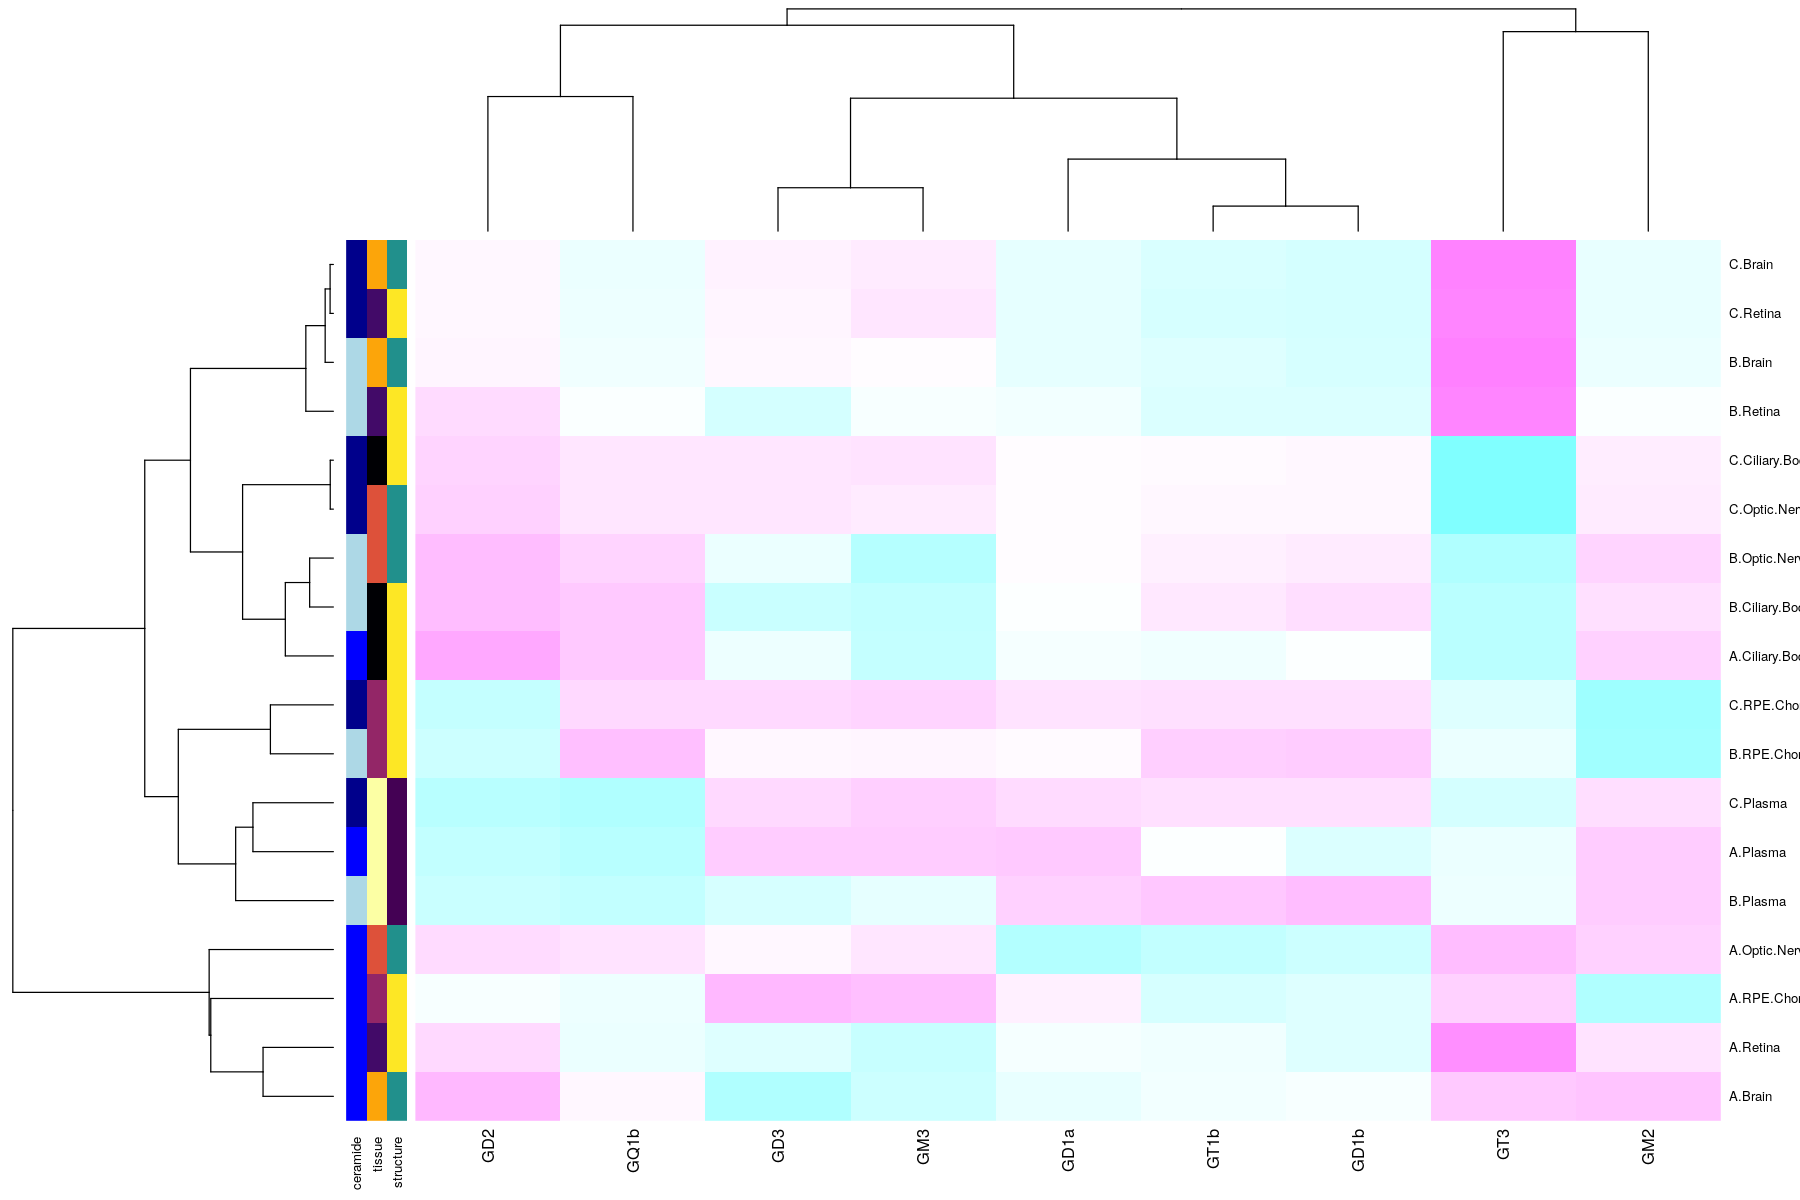

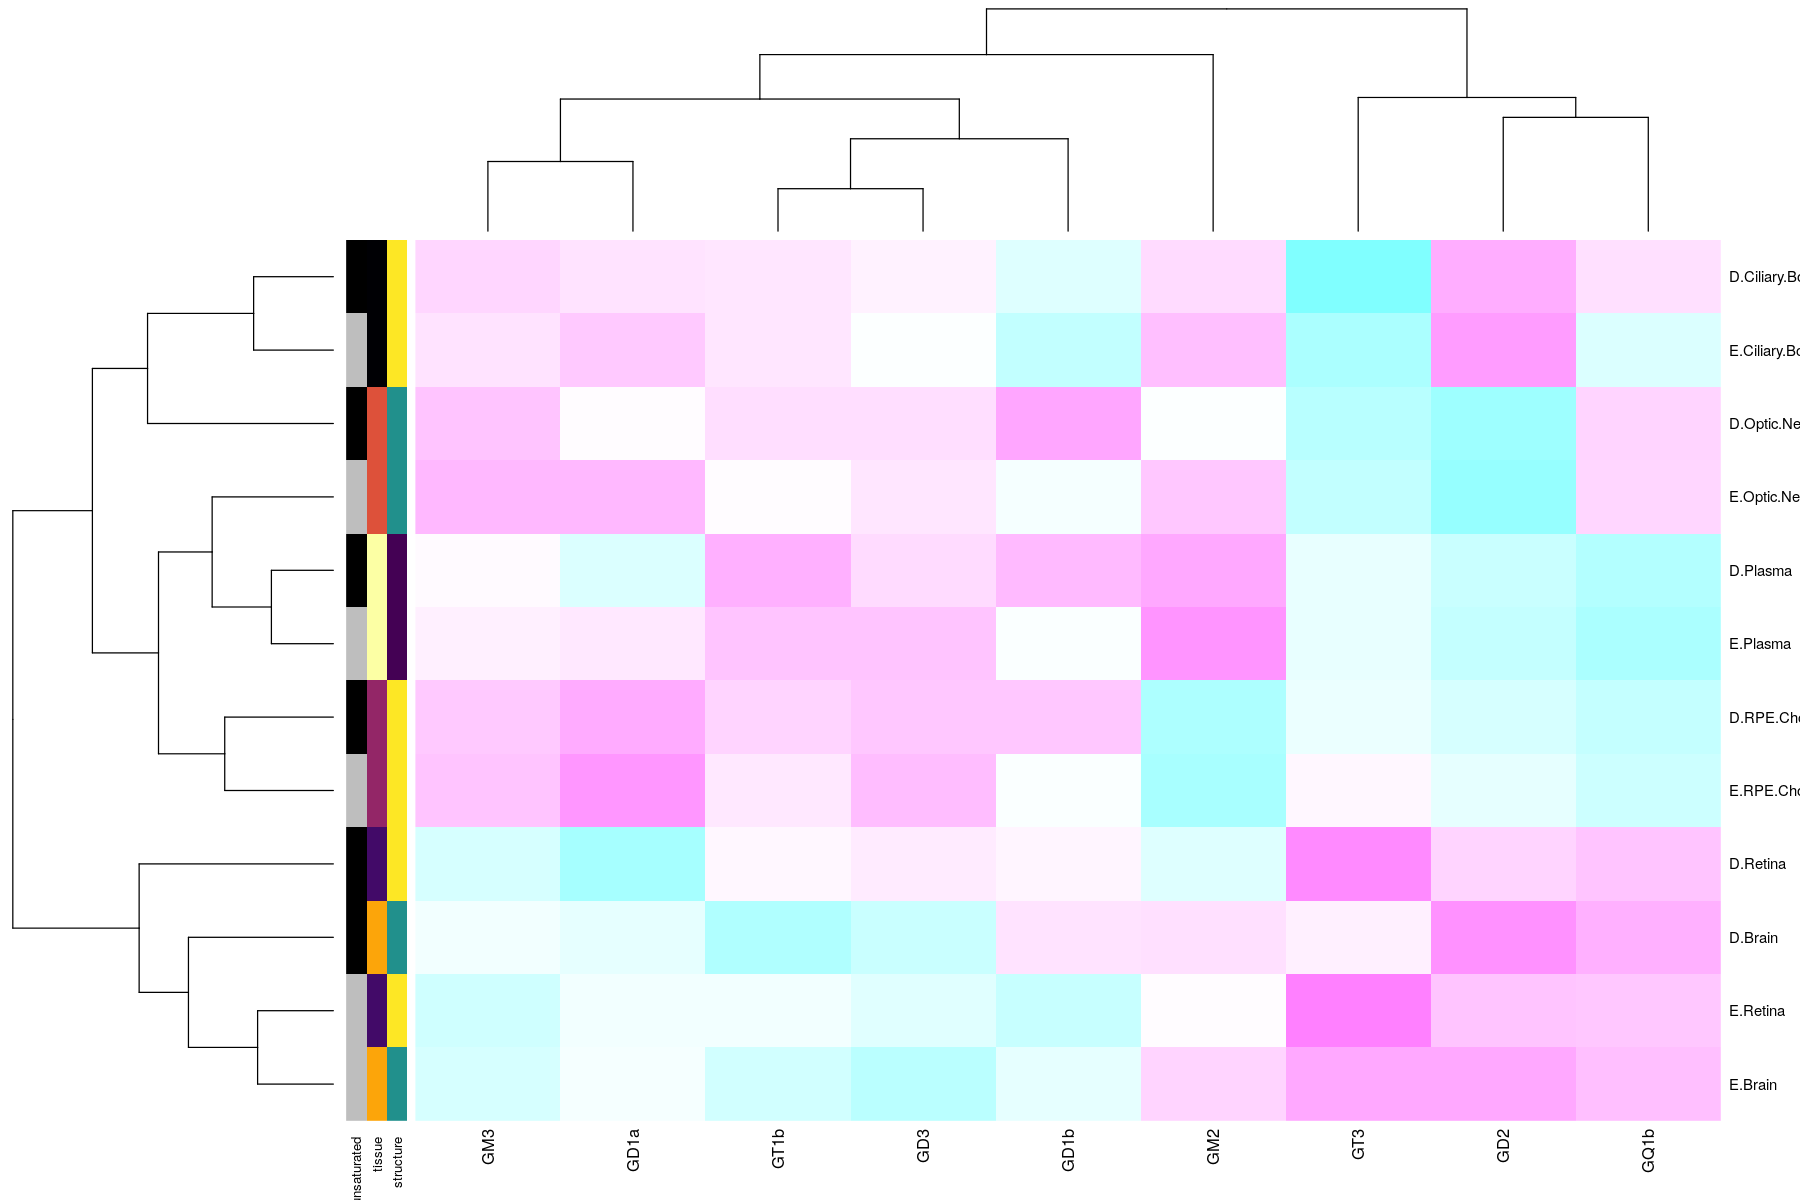

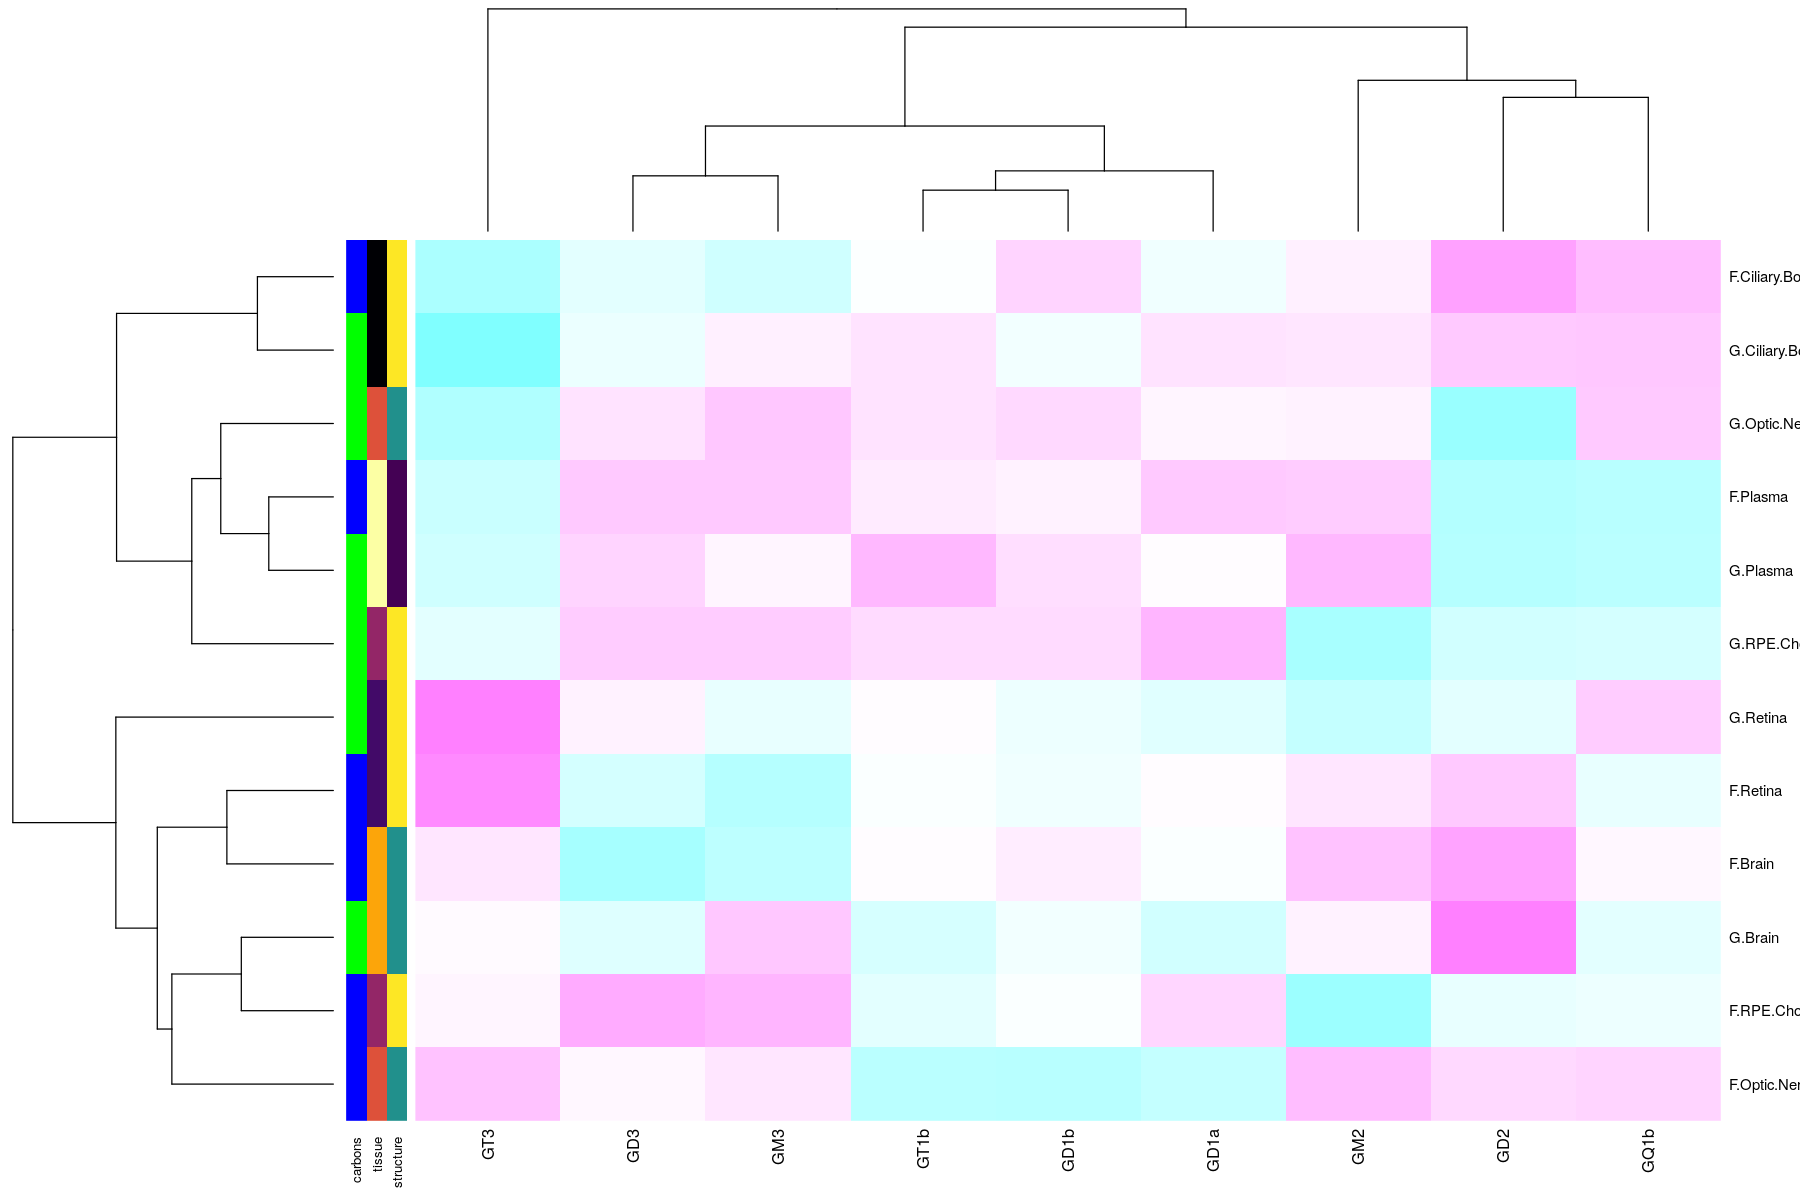

In [106]:
options(repr.plot.width=15, repr.plot.height=10)


id = 'ceramide'
idx=!is.na(samp_annot_col[[id]])
heatmap.plus(scale(log(1e-3+data.matrix(glycan_abd[idx,grepl('^G',colnames(glycan_abd))]))),
             col=cm.colors(100),#col=viridis(100),
             RowSideColors = as.matrix(samp_annot_col)[idx,c(id,'tissue','structure')])

id = 'unsaturated'
idx=!is.na(samp_annot_col[[id]])
heatmap.plus(scale(log(1e-3+data.matrix(glycan_abd[idx,grepl('^G',colnames(glycan_abd))]))),
             col=cm.colors(100),#col=viridis(100),
             RowSideColors = as.matrix(samp_annot_col)[idx,c(id,'tissue','structure')])


id = 'carbons'
idx=!is.na(samp_annot_col[[id]])
heatmap.plus(scale(log(1e-3+data.matrix(glycan_abd[idx,grepl('^G',colnames(glycan_abd))]))),
             col=cm.colors(100),#col=viridis(100),
             RowSideColors = as.matrix(samp_annot_col)[idx,c(id,'tissue','structure')])

# #############################
# id = 'ceramide'
# idx=!is.na(samp_annot_col[[id]])
# heatmap.plus(scale(log(1e-3+data.matrix(motif_abd[idx,which(grepl('^L',colnames(motif_abd)))[-1]]))),
#              col=cm.colors(100),#col=viridis(100),
#              RowSideColors = as.matrix(samp_annot_col)[idx,c(id,'tissue','structure')])

# id = 'unsaturated'
# idx=!is.na(samp_annot_col[[id]])
# heatmap.plus(scale(log(1e-3+data.matrix(motif_abd[idx,which(grepl('^L',colnames(motif_abd)))[-1]]))),
#              col=cm.colors(100),#col=viridis(100),
#              RowSideColors = as.matrix(samp_annot_col)[idx,c(id,'tissue','structure')])


# id = 'carbons'
# idx=!is.na(samp_annot_col[[id]])
# heatmap.plus(scale(log(1e-3+data.matrix(motif_abd[idx,which(grepl('^L',colnames(motif_abd)))[-1]]))),
#              col=cm.colors(100),#col=viridis(100),
#              RowSideColors = as.matrix(samp_annot_col)[idx,c(id,'tissue','structure')])


# # heatmap.plus(scale(log(1e-6+data.matrix(glycan_abd[,grepl('^G',colnames(glycan_abd))]))),
# #              #col=cm.colors(100),#col=viridis(100),
# #              RowSideColors = as.matrix(samp_annot_col))

# # heatmap.plus(scale(log(1e-6+data.matrix(motif_abd[,which(grepl('^L',colnames(motif_abd)))[-1]]))),
# #              #col=cm.colors(100),#col=viridis(100),
# #              RowSideColors = as.matrix(samp_annot_col))

In [115]:
# defining structures in the eye
idx=motif_abd$structure %in% c('eye')
fdr=p.adjust(lapply(Ls<-grep('^L',colnames(motif_abd),value=T),function(x){
    d=motif_abd[idx,x]
    summary(aov(d~tissue,data=motif_abd[idx,]))[[1]][1,5]
}),'fdr')
Ls[fdr<.1]

# defining structures in the eye
cbx = combn(motif_abd$tissue,2)
for(i in 1:ncol(cbx)){
    
    idx=motif_abd$tissue %in% cbx[,i]
    fdr=p.adjust(lapply(Ls<-grep('^L',colnames(motif_abd),value=T),function(x){
        d=motif_abd[idx,x]
        t=droplevels(motif_abd$tissue[idx])
        summary(aov(d~t))[[1]][1,5]
    }),'fdr')
    if(any(fdr<.1)){
        print(as.character(cbx[,i]))
        print(Ls[fdr<.1])
    }

}
# # defining structures rostral-caudal
# idx=!is.na(motif_abd$rostral_caudal)
# fdr=p.adjust(lapply(Ls<-grep('^L',colnames(motif_abd),value=T),function(x){
#     d=motif_abd[idx,x]
#     cor.test(d,motif_abd$rostral_caudal[idx])$p.value
# }),'fdr')
# Ls[fdr<.1]

[1] "L28808"

[1] "Retina" "Brain" 
[1] NA       "L28795" "L28808"
[1] "Retina"      "RPE.Choroid"
[1] NA       "L28808"
[1] "Retina"       "Ciliary.Body"
[1] NA       "L28799" "L28808" "L28813" "L28804"
[1] "Retina"      "Optic.Nerve"
[1] NA       "L28808"
[1] "Retina" "Plasma"
[1] NA       "L28795" "L28808" "L28807"


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


[1] "a-D-Neux5Ac-(2-8)-a-D-Neux5Ac-(2-3)-b-D-Galx-(1-4)-b-D-Glcx"

[1] "b-D-Galx2NAc-(1-4)-[a-D-Neux5Ac-(2-3)]b-D-Galx-(1-4)-b-D-Glcx"

[1] "a-D-Neux5Ac-(2-3)-b-D-Galx-(1-3)-b-D-Galx2NAc-(1-4)-[a-D-Neux5Ac-(2-3)]b-D-Galx-(1-4)-b-D-Glcx"

TableGrob (3 x 2) "arrange": 6 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]

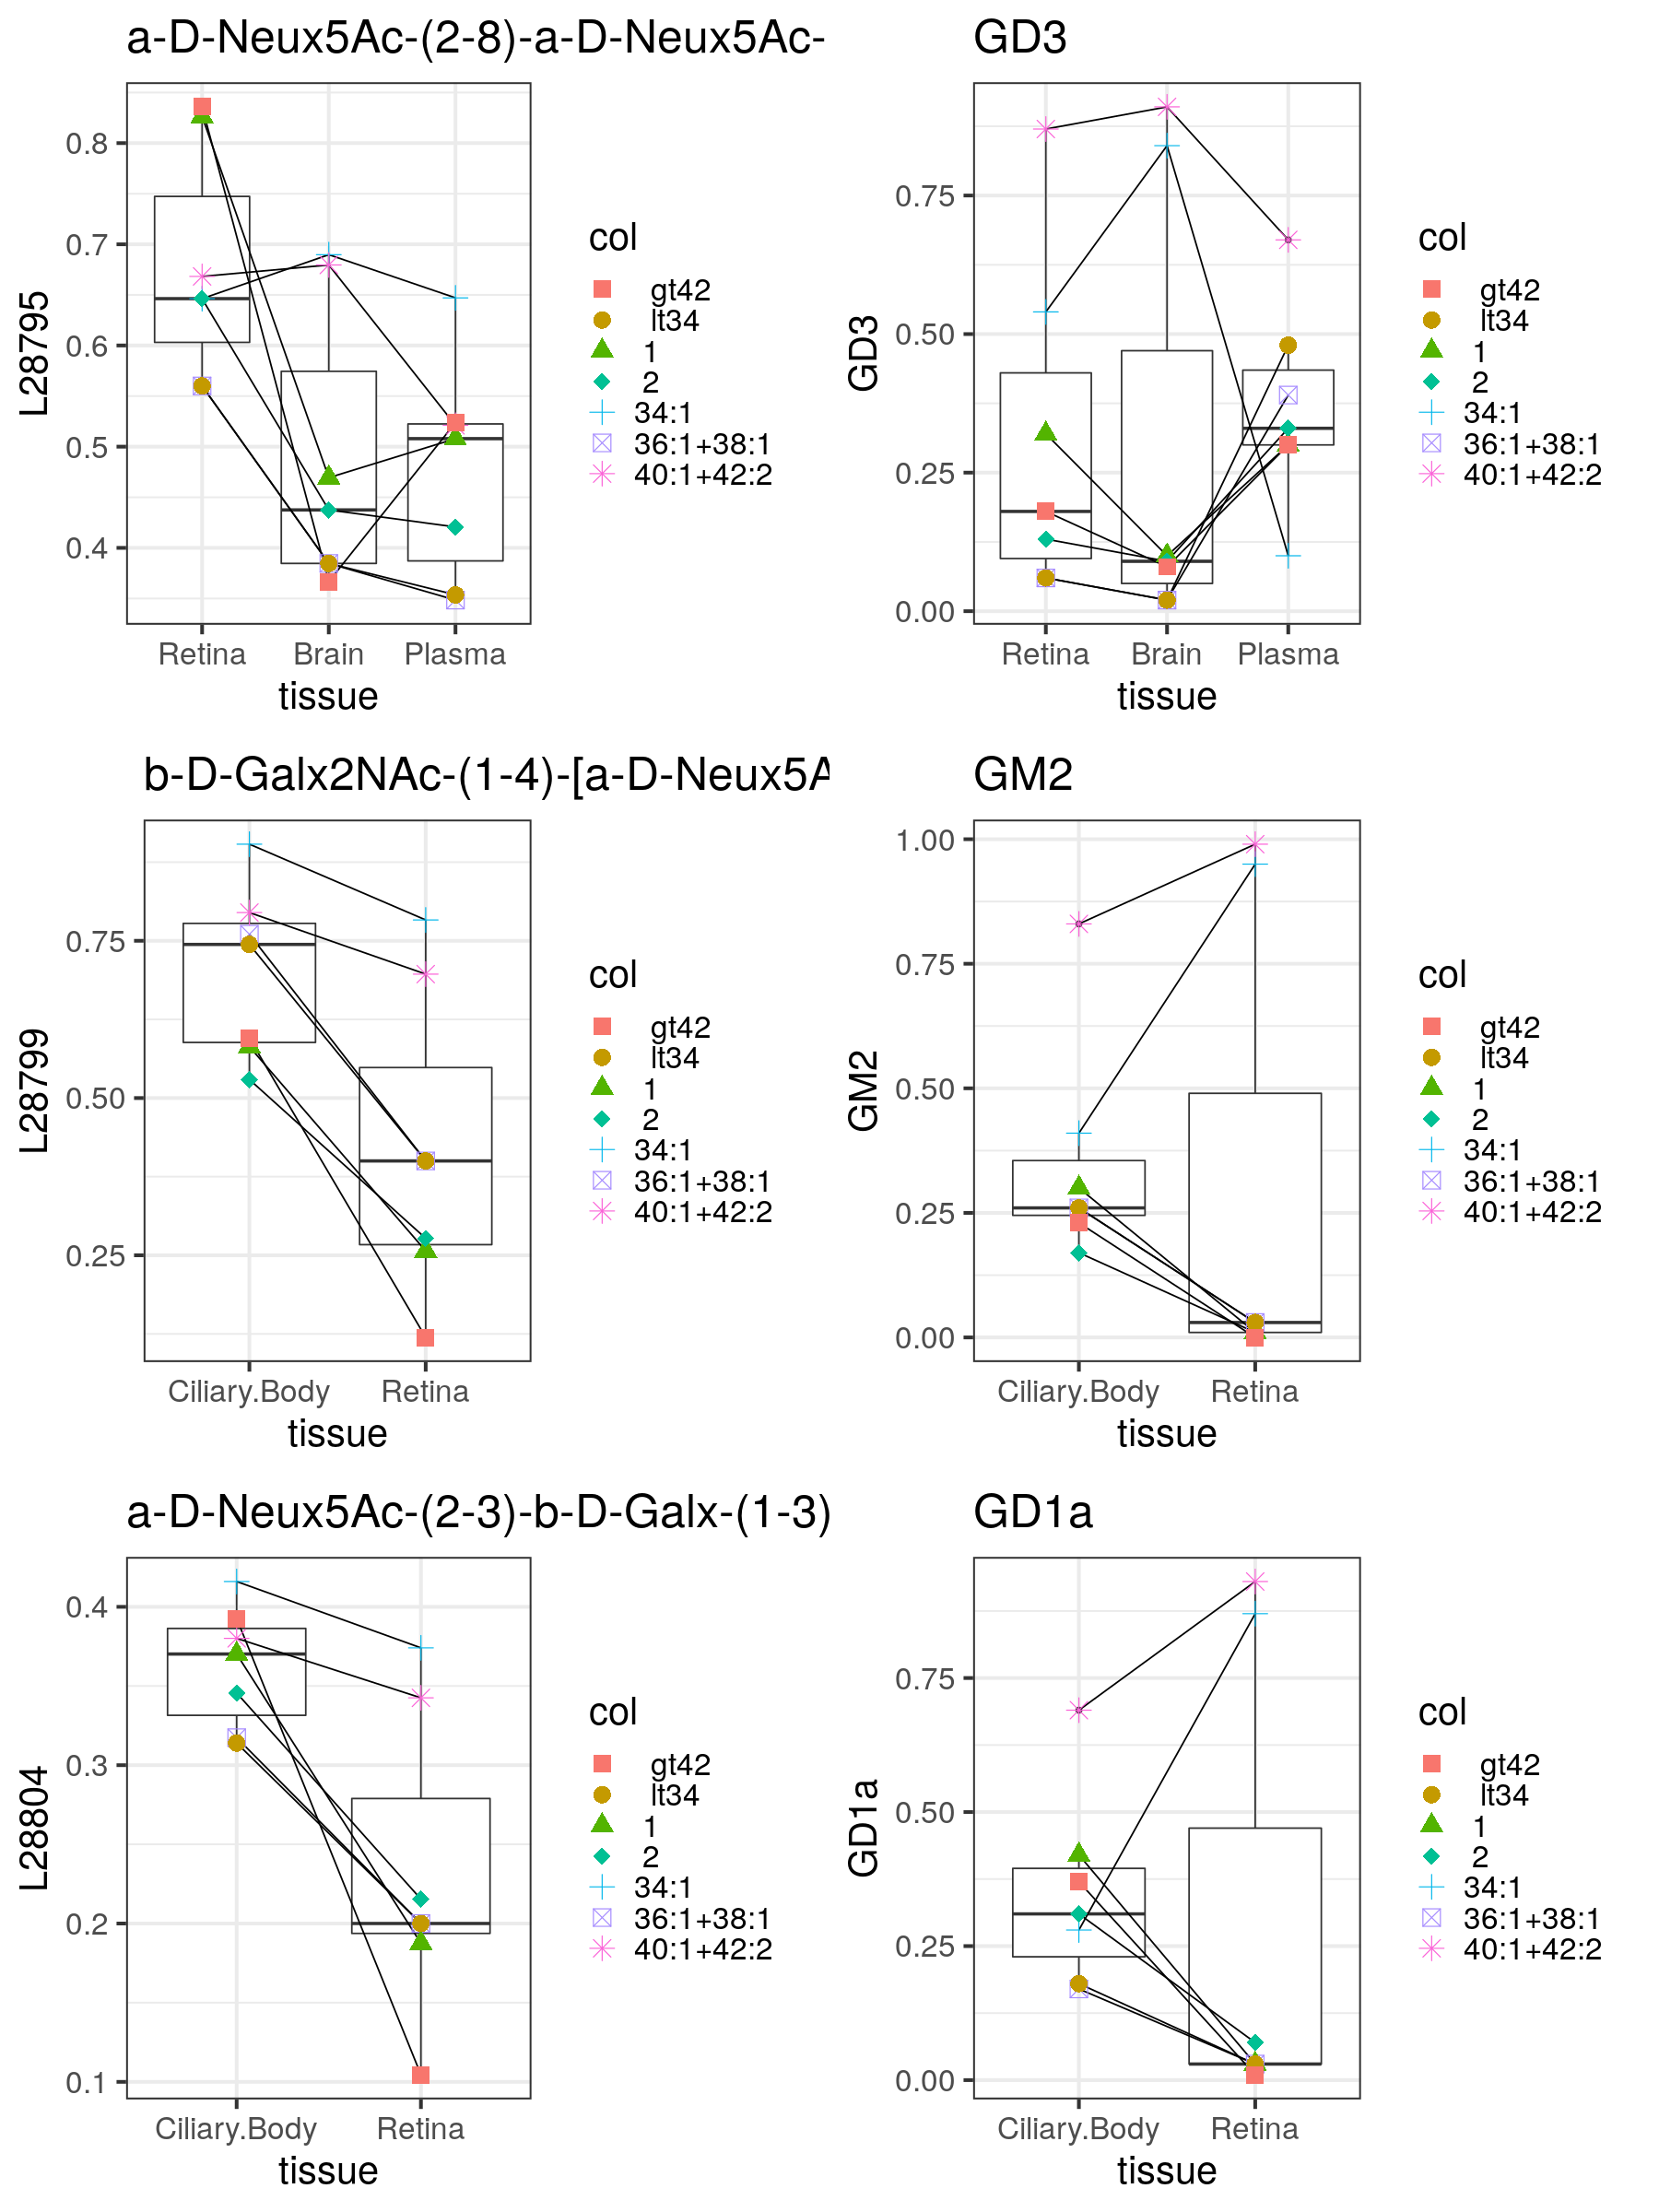

In [168]:
options(repr.plot.width=15, repr.plot.height=20)

dat_m = motif_abd
dat_m$ceramide = as.character(dat_m$ceramide)
dat_m$carbons = as.character(dat_m$carbons)
dat_m[is.na(dat_m)] = ''
dat_m$col = with(dat_m,paste(ceramide,factor(unsaturated),carbons))

dat_g = glycan_abd
dat_g$ceramide = as.character(dat_g$ceramide)
dat_g$carbons = as.character(dat_g$carbons)
dat_g[is.na(dat_g)] = ''
dat_g$col = with(dat_g,paste(ceramide,factor(unsaturated),carbons))

###################3

# GD3
gi=glypy$io$iupac$dumps(glypy$io$glycoct$loads(motif_vect$L1[motif_vect$value=='L28795']))
gi
g1=ggplot(dat_m[ dat_m$tissue%in%c("Retina","Brain",'Plasma'),] ,aes(y=L28795,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
    geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
    scale_shape_manual(values=c(15:18,3,7,8,9))+
    theme_bw(base_size = 25)+ggtitle(gi)
g1b=ggplot(dat_g[ dat_g$tissue%in%c("Retina","Brain",'Plasma'),] ,aes(y=GD3,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
    geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
    scale_shape_manual(values=c(15:18,3,7,8,9))+
    theme_bw(base_size = 25)+ggtitle('GD3')

# GM2
gi=glypy$io$iupac$dumps(glypy$io$glycoct$loads(motif_vect$L1[motif_vect$value=='L28799']))
gi
g2=ggplot(dat_m[ dat_m$tissue%in%c("Retina","Ciliary.Body"),] ,aes(y=L28799,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
    geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
    scale_shape_manual(values=c(15:18,3,7,8,9))+
    theme_bw(base_size = 25)+ggtitle(gi)
g2b=ggplot(dat_g[ dat_g$tissue%in%c("Retina","Ciliary.Body"),] ,aes(y=GM2,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
    geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
    scale_shape_manual(values=c(15:18,3,7,8,9))+
    theme_bw(base_size = 25)+ggtitle('GM2')

# # GM1a
# gi=glypy$io$iupac$dumps(glypy$io$glycoct$loads(motif_vect$L1[motif_vect$value=='L28813']))
# gi
# g3=ggplot(dat_m[ dat_m$tissue%in%c("Retina","Ciliary.Body"),] ,aes(y=L28813,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
#     geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
#     scale_shape_manual(values=c(15:18,3,7,8,9))+
#     theme_bw(base_size = 25)+ggtitle(gi)
# g3b=ggplot(dat_g[ dat_g$tissue%in%c("Retina","Ciliary.Body"),] ,aes(y=GM1a,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
#     geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
#     scale_shape_manual(values=c(15:18,3,7,8,9))+
#     theme_bw(base_size = 25)+ggtitle('GM1a')

# GD1a
gi=glypy$io$iupac$dumps(glypy$io$glycoct$loads(motif_vect$L1[motif_vect$value=='L28804']))
gi
g4=ggplot(dat_m[ dat_m$tissue%in%c("Retina","Ciliary.Body"),] ,aes(y=L28804,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
    geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
    scale_shape_manual(values=c(15:18,3,7,8,9))+
    theme_bw(base_size = 25)+ggtitle(gi)
g4b=ggplot(dat_g[ dat_g$tissue%in%c("Retina","Ciliary.Body"),] ,aes(y=GD1a,x=tissue))+geom_boxplot()+geom_line(aes(group=col),position=position_dodge(width=0))+
    geom_point(aes(color=col,shape=col),size=5,position = position_dodge(width=0))+
    scale_shape_manual(values=c(15:18,3,7,8,9))+
    theme_bw(base_size = 25)+ggtitle('GD1a')

g=grid.arrange(grobs=list(g1,g1b,g2,g2b,g4,g4b),ncol=2)
# g1
# g2
# g3
# g4
g
ggsave(g,filename = 'results/boxplots.pdf',width=15,height=25)


In [81]:
motif_abd()

[1] 0